# Latar Belakang

Sebuah toko supermarket ingin merekrut data scientist untuk melakukan analisis terhadap aktivitas (penjualan maupun promosi) di tokonya. Toko tersebut merasa sudah melakukan banyak cara tetapi belum ada yang maksimal untuk meningkatkan Revenue penjualan toko

# Rumusan Masalah

Toko ingin mengetahui 3 hal :
- Jenis produk yang diminati sehingga bisa menambahkan variansi pada jenis produk tersebut
- Bentuk campaign/promosi yang cocok untuk customernya
- Behaviour customer untuk metode pembelian (online/offline)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Supermarket Customers.csv',sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Dataset ini berisikan 4 komponen data customer dari suatu supermarket, yaitu :
- People : data demografi dari customer, **seperti gender, tahun lahir, status pernikahan, income, dll**
- Produk : data produk yang dibeli oleh customer, **seperti daging, ikan, buah, wine, dll**
- Promotion : data jumlah transaksi berdasarkan promosi yang ada, **seperti jumlah transaksi ketika diskon, transaksi setelah promosi, respond terhadap campaign, dll**
- Place : data transaksi berdasarkan channelnya, **seperti pembelian via website, store, dan katalog**

# Data Understanding dan Cleaning

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [4]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

Secara umum, kita dapat melihat bahwa :
* Dataset ini memiliki 2240 baris dan 29 kolom
* Dataset ini memiliki nilai data kosong pada kolom `Income` sebanyak 24 baris
* Data kosong ini bisa kita gantikan dengan nilai `0`, tidak perlu dihapus dikarenakan kita bisa beranggapan bahwa customer tersebut tidak memiliki income (tidak bekerja)
* Pada kolom `Marital_Status`, valuenya berisikan *Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO*. Untuk case ini, kita akan membuatnya menjadi 2 jenis saja yaitu *Married dan Single*. Maka :
    - *Together* akan diubah menjadi *Married*
    - *Divorced* akan diubah menjadi *Single*
    - *Widow* akan diubah menjadi *Single*
    - *Alone* akan diubah menjadi *Single*
    - *Absurd* akan diubah menjadi *Single*
    - *YOLO* akan diubah menjadi *Single*
* Pada kolom `Dt_Customer`, akan kita konversikan menjadi tahun sehingga kita bisa menambahkan kolom `Age` untuk kebutuhan analisis

In [7]:
# Konversi pada kolom marital status

df.loc[df['Marital_Status']=='Together','Marital_Status']='Married'
df.loc[df['Marital_Status']=='Divorced','Marital_Status']='Single'
df.loc[df['Marital_Status']=='Widow','Marital_Status']='Single'
df.loc[df['Marital_Status']=='Alone','Marital_Status']='Single'
df.loc[df['Marital_Status']=='Absurd','Marital_Status']='Single'
df.loc[df['Marital_Status']=='YOLO','Marital_Status']='Single'
df['Marital_Status'].unique()

array(['Single', 'Married'], dtype=object)

In [8]:
# Konversi data Dt_Customer untuk menambahkan kolom 'Age'

df['Age'] = 2024 - df['Year_Birth']
df['Age']

0       67
1       70
2       59
3       40
4       43
        ..
2235    57
2236    78
2237    43
2238    68
2239    70
Name: Age, Length: 2240, dtype: int64

# Missing Value

Data missing Value hanya ada di kolom `Income`

In [9]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
dtype: int64

In [10]:
df['Income'].fillna(0,inplace=True)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

Dataset sudah tidak memiliki missing value di setiap kolomnya, sehingga kita bisa melanjutkan ke tahap selanjutnya.

# Dataset yang sudah bersih

In [11]:
listItem = []
for col in df.columns:
    unique_sample = df[col].drop_duplicates().sample(min(2, df[col].nunique()), replace=False).values.tolist()
    listItem.append([col, df[col].dtype, df[col].isna().sum(), df[col].nunique(), unique_sample])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                      data=listItem)

print("Shape dari dataframe yang kita miliki adalah :", df.shape)
print(f'\n{dfDesc}')

Shape dari dataframe yang kita miliki adalah : (2240, 30)

           dataFeatures dataType  null  unique              uniqueSample
0                    ID    int64     0    2240              [3856, 1745]
1            Year_Birth    int64     0      59              [1985, 1954]
2             Education   object     0       5           [2n Cycle, PhD]
3        Marital_Status   object     0       2         [Single, Married]
4                Income  float64     0    1975        [56715.0, 42021.0]
5               Kidhome    int64     0       3                    [0, 2]
6              Teenhome    int64     0       3                    [1, 2]
7           Dt_Customer   object     0     663  [22-09-2013, 04-09-2013]
8               Recency    int64     0     100                   [3, 27]
9              MntWines    int64     0     776                [341, 457]
10            MntFruits    int64     0     158                  [32, 65]
11      MntMeatProducts    int64     0     558                [24

# Data Analysis
Toko ingin mengetahui 3 hal :
- Jenis produk yang diminati sehingga bisa menambahkan variansi pada jenis produk tersebut
- Bentuk campaign/promosi yang paling efisien
- Behaviour customer untuk metode pembelian (online/offline)

In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,43


## Jumlah Complain

### Berdasarkan Jumlah Transaksi ID (Customer)

In [13]:
jumlah_complain = df['Complain'].sum()
jumlah_ID = df['ID'].count()
presentase_complain = jumlah_complain/jumlah_ID*100

print(f'Dari total {jumlah_ID} customer, terdapat {jumlah_complain} complain')
print(f'Nilai presentase complainnya adalah {presentase_complain}%')

Dari total 2240 customer, terdapat 21 complain
Nilai presentase complainnya adalah 0.9375%


### Berdasarkan Education

In [14]:
complainPerEd = df.groupby('Education')[['Complain']].sum().reset_index()
complainPerEd['%Complain']=complainPerEd['Complain']/sum(complainPerEd['Complain'])*100
complainPerEd

,Education,Complain,%Complain
0,2n Cycle,4,19.047619
1,Basic,0,0.000000
2,Graduation,14,66.666667
3,Master,2,9.523810
4,PhD,1,4.761905


### Berdasarkan Marital Status

In [15]:
complainPerStat = df.groupby('Marital_Status')[['Complain']].sum().reset_index()
complainPerStat['%Complain']=complainPerStat['Complain']/sum(complainPerStat['Complain'])*100
complainPerStat

,Marital_Status,Complain,%Complain
0,Married,13,61.904762
1,Single,8,38.095238


### Berdasarkan Income

In [16]:
# Membuat 4 kategori berdasarkan income customer

def kategori_income(income):
    if income < 25000:
        return 'low'
    elif income >= 25000 and income < 50000:
        return 'medium'
    elif income >= 50000 and income < 100000:
        return 'high'
    elif income >= 100000:
        return 'premium'

In [17]:
df['Kategori Income'] = df['Income'].apply(kategori_income)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Kategori Income
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,67,high
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,70,medium
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,59,high
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,40,medium
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,43,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,57,high
2236,4001,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,78,high
2237,7270,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,43,high
2238,8235,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,68,high


In [18]:
complainPerIncome = df.groupby('Kategori Income')[['Complain']].sum().reset_index()
complainPerIncome['%Complain']=complainPerIncome['Complain']/sum(complainPerIncome['Complain'])*100
complainPerIncome

,Kategori Income,Complain,%Complain
0,high,7,33.333333
1,low,3,14.285714
2,medium,11,52.380952
3,premium,0,0.000000


Dari ketiga data diatas, dapat disimpulkan bahwa :
1. Jumlah komplain dari customer cukup rendah yaitu 0.9375%
2. Jenis customer yang paling banyak melakukan complain adalah **statusnya married, level educationnnya graduation, dan kategori incomenya medium**

## Jenis Produk yang Diminati Customer by Transaksi

In [19]:
count_product = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].astype(bool).sum(axis=0)
sum_product = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum()
dfCountProduct = pd.DataFrame({'Jumlah Transaksi': count_product}).sort_values(by='Jumlah Transaksi',ascending=False).reset_index()
dfCountProduct.rename(columns={'index': 'Jenis Produk'},inplace=True)
dfSumProduct = pd.DataFrame({'Total': sum_product}).sort_values(by='Total',ascending=False).reset_index()
dfSumProduct.rename(columns={'index': 'Jenis Produk'},inplace=True)
display(dfCountProduct,dfSumProduct)

,Jenis Produk,Jumlah Transaksi
0,MntMeatProducts,2239
1,MntWines,2227
2,MntGoldProds,2179
3,MntFishProducts,1856
4,MntFruits,1840
5,MntSweetProducts,1821


,Jenis Produk,Total
0,MntWines,680816
1,MntMeatProducts,373968
2,MntGoldProds,98609
3,MntFishProducts,84057
4,MntSweetProducts,60621
5,MntFruits,58917


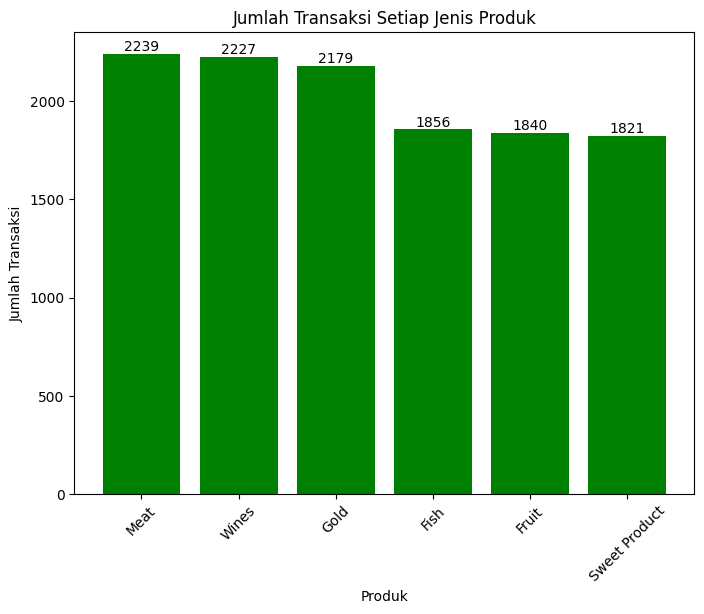

In [64]:
plt.figure(figsize=(8, 6)) 

bars = plt.bar(dfCountProduct['Jenis Produk'], dfCountProduct['Jumlah Transaksi'], color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.xlabel('Produk')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi Setiap Jenis Produk') 
plt.xticks(ticks=range(len(dfCountProduct['Jenis Produk'])), labels=['Meat', 'Wines', 'Gold', 'Fish', 'Fruit', 'Sweet Product'], rotation=45)

plt.show()

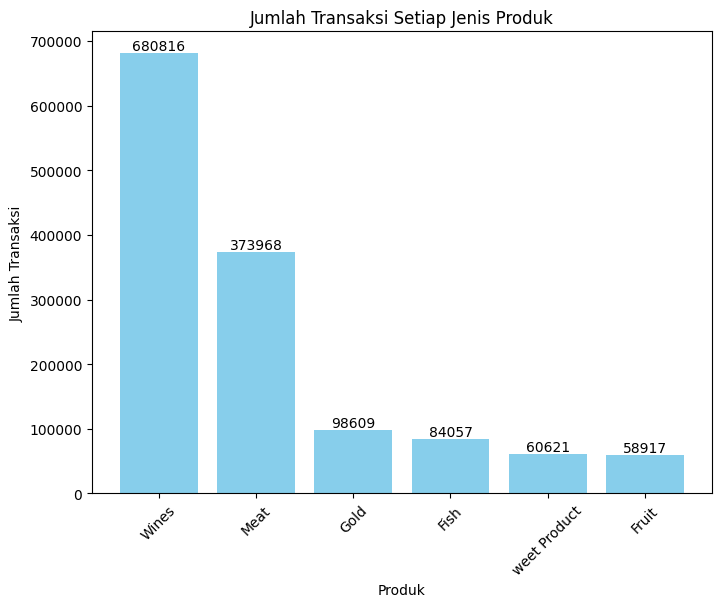

In [62]:
plt.figure(figsize=(8, 6)) 

bars = plt.bar(dfSumProduct['Jenis Produk'], dfSumProduct['Total'], color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.xlabel('Produk')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi Setiap Jenis Produk') 
plt.xticks(ticks=range(len(dfCountProduct['Jenis Produk'])), labels=['Wines', 'Meat', 'Gold', 'Fish', 'weet Product', 'Fruit'], rotation=45)

plt.show()

Dari 2 data diatas, dapat dilihat bahwa **3 Jenis Produk yang paling diminati** adalah **Wines, Meat, Gold**.
 - Wine : Jumlah transaksi 2239 dengan total transaksinya sebesar 680.816
 - Meat : Jumlah transaksi 2227 dengan total transaksinya sebesar 373.968
 - Gold : Jumlah transaksi 2179 dengan total transaksinya sebesar 98.609

 Dari 3 jenis produk diatas, mari kita perdalam analisisnya untuk masing-masing produk

### Jenis Produk Meat

In [22]:
dfMeat = df[df['MntMeatProducts']!=0]

In [23]:
ageDfMeat = dfMeat.groupby('Age')[['ID']].count().reset_index()
ageDfMeat.head()

,Age,ID
0,28,2
1,29,5
2,30,3
3,31,5
4,32,13


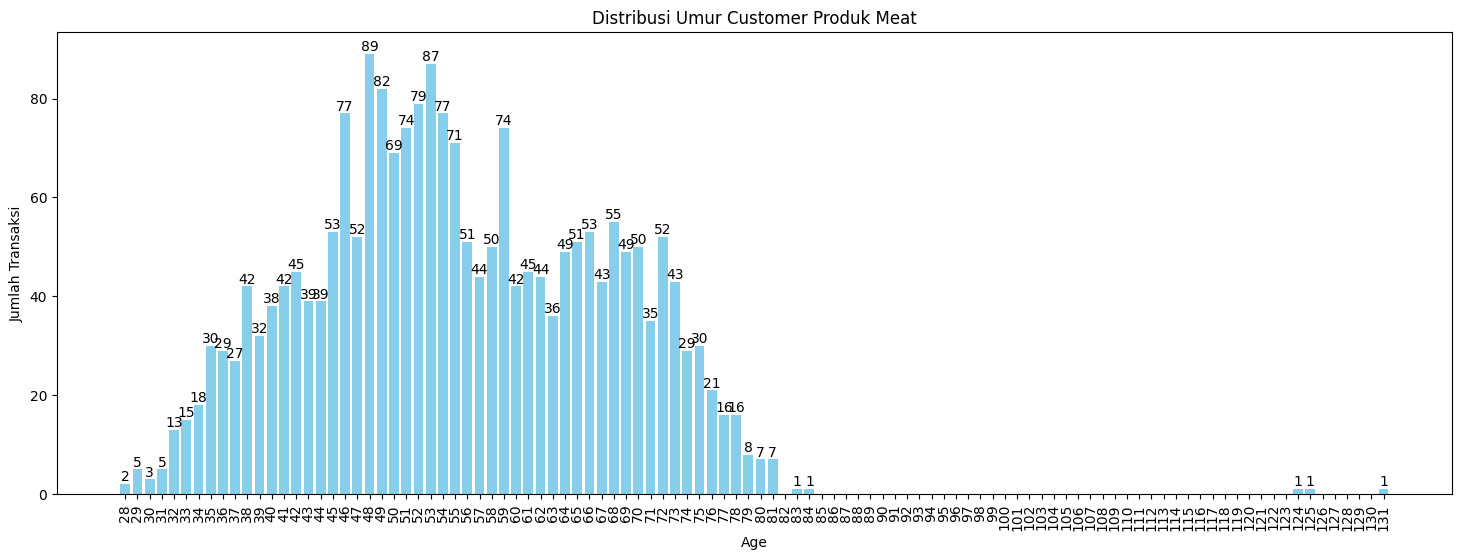

In [24]:
plt.figure(figsize=(18, 6))
bars = plt.bar(ageDfMeat['Age'], ageDfMeat['ID'], color='skyblue',width= 0.8)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom') 
plt.xlabel('Age')
plt.ylabel('Jumlah Transaksi')
plt.title('Distribusi Umur Customer Produk Meat')
plt.xticks(np.arange(28,132,1),rotation = 90)

plt.show()

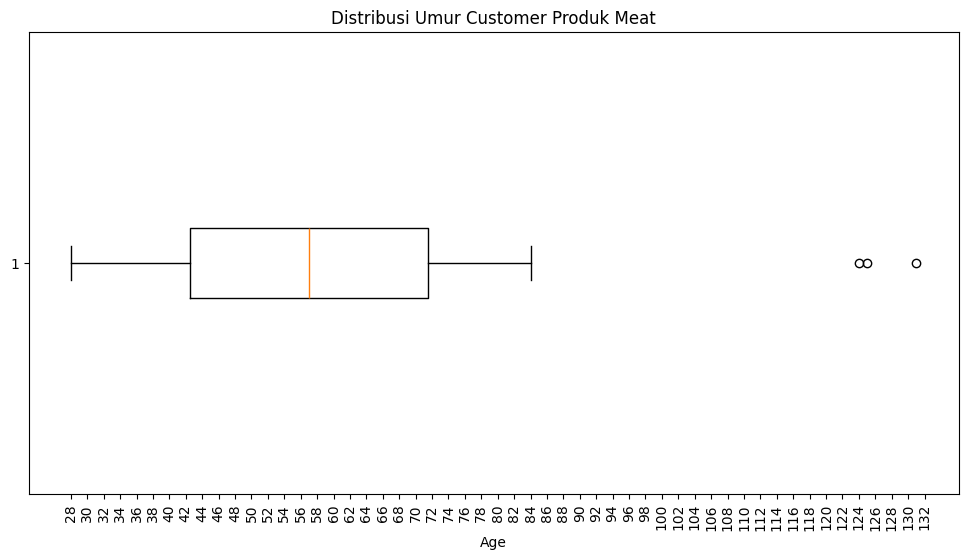

In [25]:
plt.figure(figsize=(12, 6))
plt.boxplot(ageDfMeat['Age'], vert=False)  # Menggunakan kolom 'Age' untuk membuat boxplot
plt.xlabel('Age')
plt.title('Distribusi Umur Customer Produk Meat')
plt.xticks(np.arange(28,133,2),rotation = 90)
plt.show()

In [26]:
statDfMeat = dfMeat.groupby('Marital_Status')[['ID']].count().reset_index()
statDfMeat.rename(columns={'ID':'Jumlah Transaksi'},inplace=True)
statDfMeat

,Marital_Status,Jumlah Transaksi
0,Married,1444
1,Single,795


Dari 3 data diatas, dapat dilihat bahwa kebanyakan pembeli meat product adalah customer dengan range usia **43-72** dengan jumlah tranksasi paling tinggi pada usia **48**. Pihak toko dapat menyimpulkan bahwa orang-orang yang membeli daging kebanyakan untuk kebutuhan rumah tangga. Hal tersebut dapat disimpulkan dari marital status customer pembeli daging. Terdapat **1.444** transaksi dari customer yang sudah **marrried**, kurang lebih 2 kali lipat dari yang **single (hanya 795 transaksi)**.

### Jenis Produk Wine

In [27]:
dfWine = df[df['MntWines']!=0]
dfWine

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Kategori Income
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,67,high
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,70,medium
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,59,high
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,40,medium
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,43,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,57,high
2236,4001,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,78,high
2237,7270,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,43,high
2238,8235,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,68,high


In [28]:
ageDfWine = dfMeat.groupby('Age')[['ID']].count().reset_index()
ageDfWine.head()

,Age,ID
0,28,2
1,29,5
2,30,3
3,31,5
4,32,13


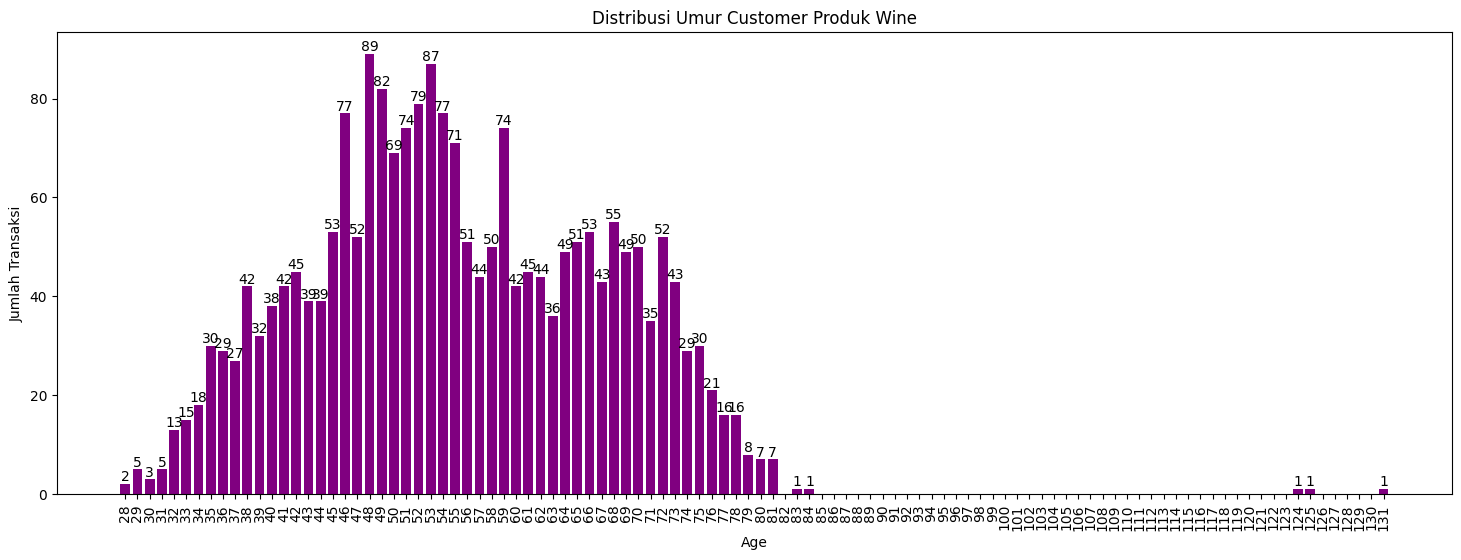

In [29]:
plt.figure(figsize=(18, 6))
bars = plt.bar(ageDfWine['Age'], ageDfWine['ID'], color='purple',width= 0.8)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom') 
plt.xlabel('Age')
plt.ylabel('Jumlah Transaksi')
plt.title('Distribusi Umur Customer Produk Wine')
plt.xticks(np.arange(28,132,1),rotation = 90)

plt.show()

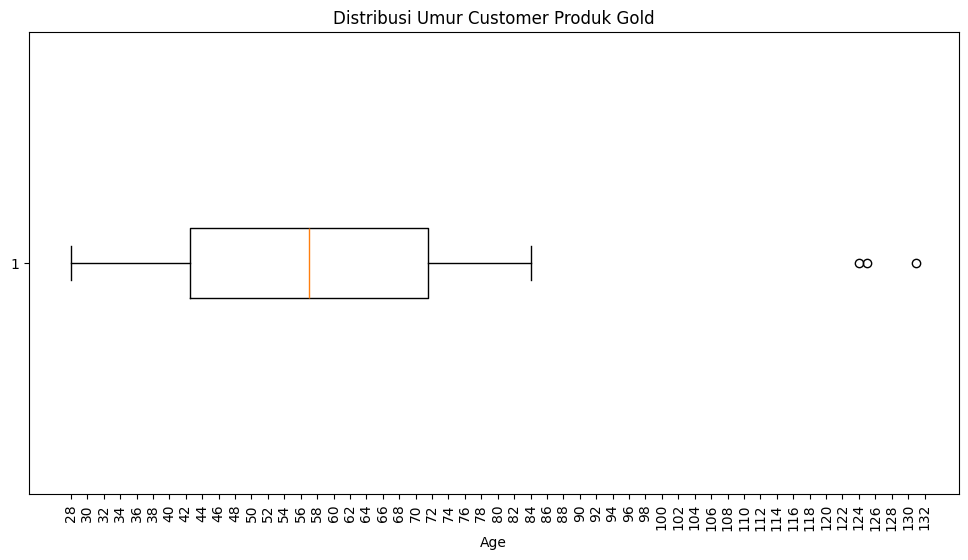

In [30]:
plt.figure(figsize=(12, 6))
plt.boxplot(ageDfWine['Age'], vert=False) 
plt.xlabel('Age')
plt.title('Distribusi Umur Customer Produk Gold')
plt.xticks(np.arange(28,133,2),rotation = 90)
plt.show()

In [31]:
statDfWine = dfWine.groupby('Marital_Status')[['ID']].count().reset_index()
statDfWine.rename(columns={'ID':'Jumlah Transaksi'},inplace=True)
statDfWine

,Marital_Status,Jumlah Transaksi
0,Married,1437
1,Single,790


Dari 3 data diatas, dapat dilihat bahwa kebanyakan pembeli wine product adalah customer dengan range usia **42-72** dengan jumlah tranksasi paling tinggi pada usia **48**. Hal ini sangat mirip seperti customer daging. Pihak toko bisa saja membuat promosi bundling untuk customer seperti **"setiap pembelian daging senilai 100 dollar, akan mendapatkan wine senilai 10 dollar"**. Hal ini juga bisa berlaku sebaliknya.

### Jenis Produk Gold

In [32]:
dfGold = df[df['MntGoldProds']!=0]
dfGold

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Kategori Income
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,67,high
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,70,medium
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,59,high
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,40,medium
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,43,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,57,high
2236,4001,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,78,high
2237,7270,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,43,high
2238,8235,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,68,high


In [33]:
ageDfGold = dfGold.groupby('Age')[['ID']].count().reset_index()
ageDfGold.head()

,Age,ID
0,28,2
1,29,5
2,30,3
3,31,5
4,32,13


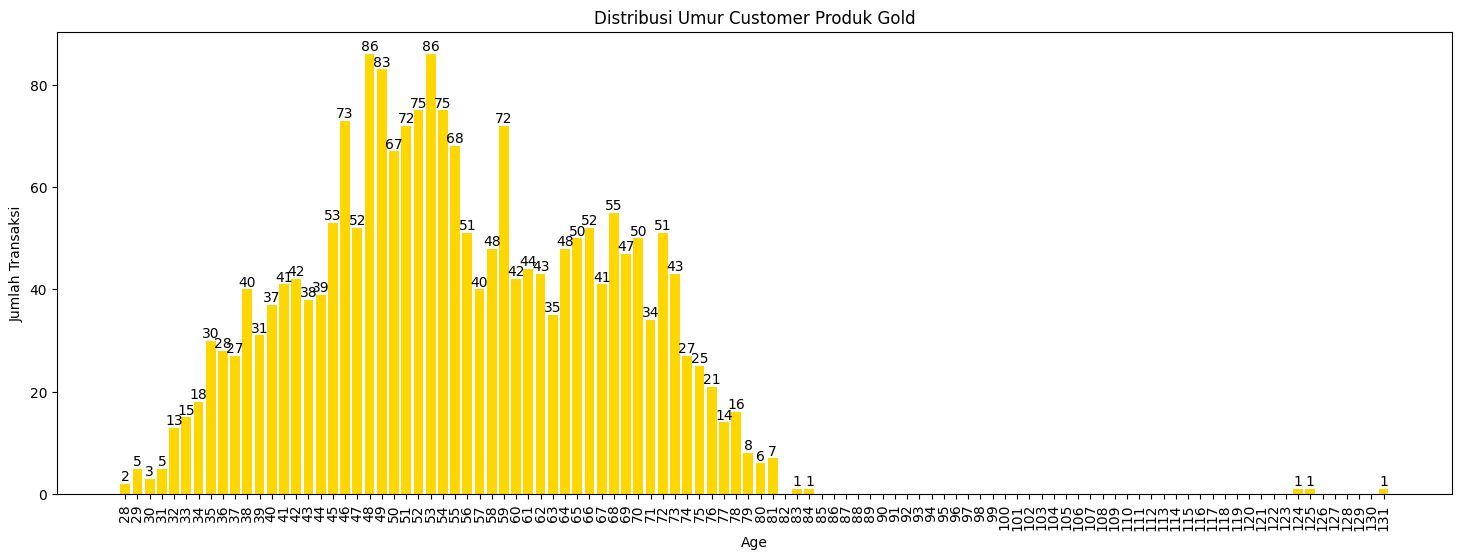

In [34]:
plt.figure(figsize=(18, 6))
bars = plt.bar(ageDfGold['Age'], ageDfGold['ID'], color='gold',width= 0.8)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom') 
plt.xlabel('Age')
plt.ylabel('Jumlah Transaksi')
plt.title('Distribusi Umur Customer Produk Gold')
plt.xticks(np.arange(28,132,1),rotation = 90)

plt.show()

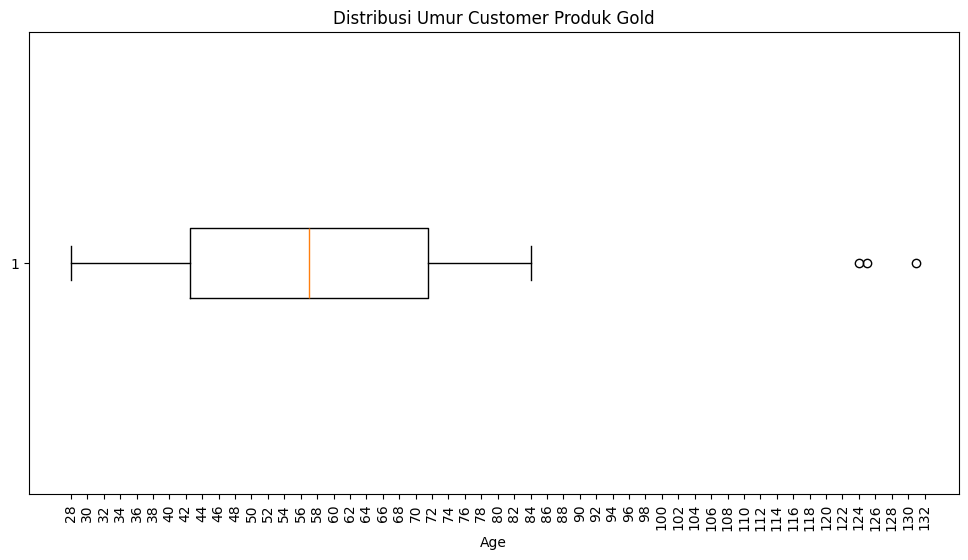

In [35]:
plt.figure(figsize=(12, 6))
plt.boxplot(ageDfGold['Age'], vert=False) 
plt.xlabel('Age')
plt.title('Distribusi Umur Customer Produk Gold')
plt.xticks(np.arange(28,133,2),rotation = 90)
plt.show()

In [36]:
statDfGold = dfGold.groupby('Marital_Status')[['ID']].count().reset_index()
statDfGold.rename(columns={'ID':'Jumlah Transaksi'},inplace=True)
statDfGold

,Marital_Status,Jumlah Transaksi
0,Married,1400
1,Single,779


Dari 3 data diatas, dapat dilihat bahwa kebanyakan pembeli gold product adalah customer dengan range usia **42-72** dengan jumlah tranksasi paling tinggi pada usia **48 dan 53**. Hal ini sangat mirip seperti customer daging dan wine. 

## Jenis Produk yang Diminati Customer by Income

In [37]:
incomePerProduk = df.groupby('Kategori Income')[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum().reset_index()
incomePerProduk['Total'] = incomePerProduk[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
incomePerProduk.sort_values('Total',ascending=False).reset_index()

,index,Kategori Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total
0,0,high,601498,50725,328110,71569,51760,73908,1177570
1,2,medium,69017,5782,30936,9537,5892,18342,139506
2,1,low,7421,1987,9156,2562,2256,5745,29127
3,3,premium,2880,423,5766,389,713,614,10785


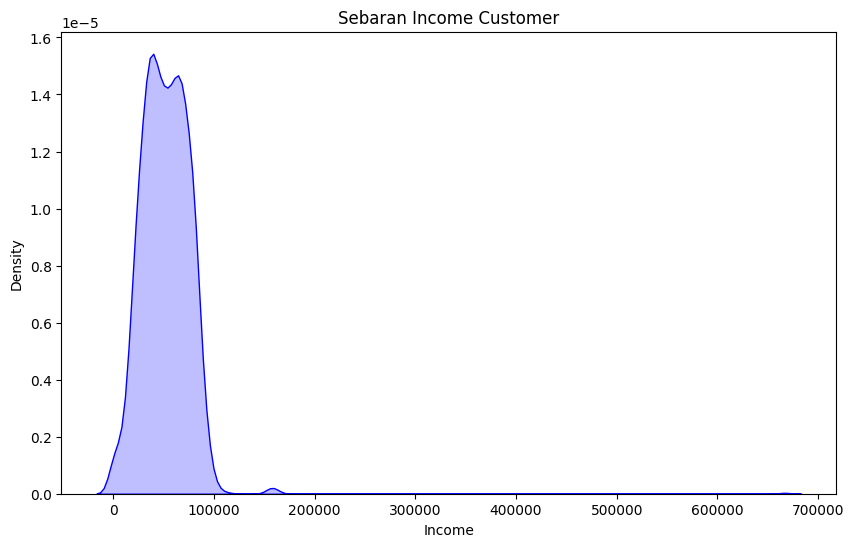

In [38]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df['Income'], shade=True, color='Blue')

plt.xlabel('Income')
plt.ylabel('Density')
plt.title('Sebaran Income Customer')

plt.show()

In [39]:
columns_of_interest = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for column in columns_of_interest:
    correlation_coefficient, p_value = pearsonr(df[column], df['Income'])
    print(f"Korelasi antara {column} dan Income:")
    print(f"Koefisien Korelasi: {correlation_coefficient}")
    print(f"P-value: {p_value}")
    print()

Korelasi antara MntWines dan Income:
Koefisien Korelasi: 0.5708505703548221
P-value: 6.822112262084393e-194

Korelasi antara MntFruits dan Income:
Koefisien Korelasi: 0.42191037359450245
P-value: 2.175053159498947e-97

Korelasi antara MntMeatProducts dan Income:
Koefisien Korelasi: 0.5653178075241532
P-value: 2.2324538292142494e-189

Korelasi antara MntFishProducts dan Income:
Koefisien Korelasi: 0.4318792950610467
P-value: 1.858147843797293e-102

Korelasi antara MntSweetProducts dan Income:
Koefisien Korelasi: 0.4247611123455498
P-value: 8.044068819627457e-99

Korelasi antara MntGoldProds dan Income:
Koefisien Korelasi: 0.3126000384528358
P-value: 5.725382721361597e-52



Dari 2 data diatas, dapat disimpulkan bahwa :

- Urutan kategori income dari customer toko ini adalah *high, medium, low, premium*
- Kebanyakan customer toko memiliki income under 100.000
- Terdapat beberapa customer yang memiliki income diatas 100.000
- Income memiliki hubungan yang signifikan terhadap jenis produk yang dibeli. Jenis **produk Wine dan Meat memiliki hubungan yang paling tinggi** dibandingkan dengan yang lainnya. 

2 Hal ini bisa menjadi landasan pihak toko untuk membuat segmentasi dari produknya. Pihak toko juga bisa memperhatikan customer yang memiliki income diatas 100.000 untuk menyediakan produk yang lebih premium. 

## Bentuk promosi yang paling efisien

### Sebaran Usia yang Membeli Ketika Sedang Ada Promo

In [40]:
agePerDeals = df.groupby('Age')[['NumDealsPurchases']].sum().reset_index()
agePerDeals.head()

,Age,NumDealsPurchases
0,28,4
1,29,5
2,30,3
3,31,5
4,32,19


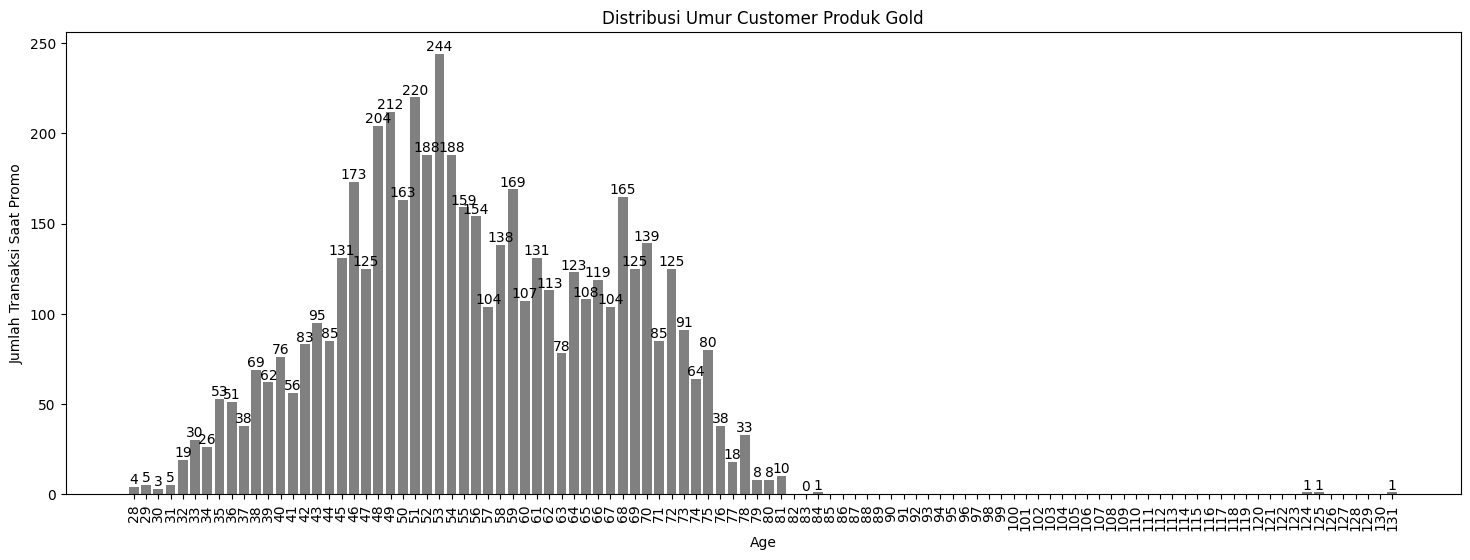

In [41]:
plt.figure(figsize=(18, 6))
bars = plt.bar(agePerDeals['Age'], agePerDeals['NumDealsPurchases'], color='grey',width= 0.8)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom') 
plt.xlabel('Age')
plt.ylabel('Jumlah Transaksi Saat Promo')
plt.title('Distribusi Umur Customer Produk Gold')
plt.xticks(np.arange(28,132,1),rotation = 90)

plt.show()

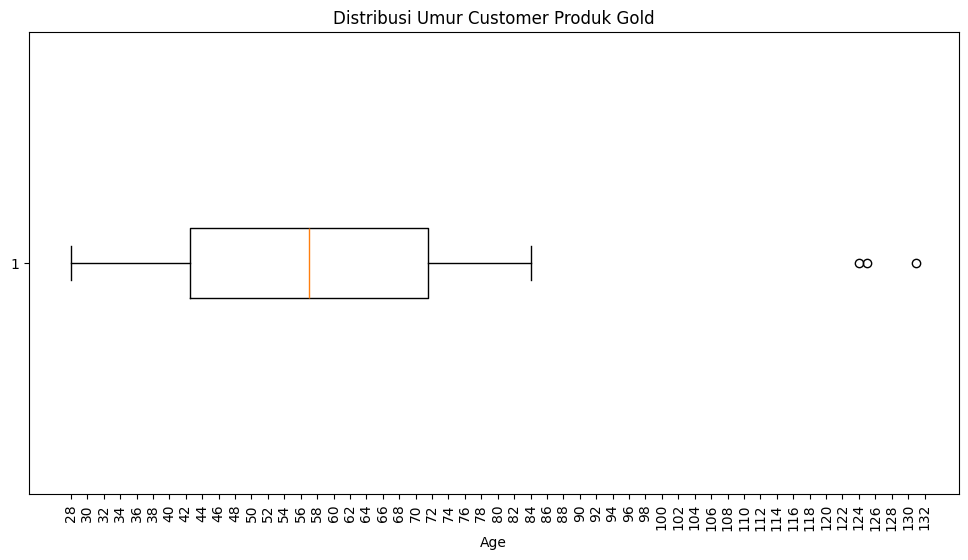

In [42]:
plt.figure(figsize=(12, 6))
plt.boxplot(agePerDeals['Age'], vert=False) 
plt.xlabel('Age')
plt.title('Distribusi Umur Customer Produk Gold')
plt.xticks(np.arange(28,133,2),rotation = 90)
plt.show()

Dari 2 data diatas, dapat dilihat bahwa kebanyakan customer yang membeli ketika ada promo berada di range usia **42-72** dengan jumlah transaksi terbanyak pada usia **53 sebanyak 244**. Pihak toko bisa menyesuaikan bentuk promosi yang cocok pada range usia tersebut. 

Sekarang, mari kita lihat jenis campaign dan jumlah transaksi yang dihasilkan

In [43]:
sum_promotion = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum()
dfSumPromotion = pd.DataFrame({'Total': sum_promotion}).sort_values(by='Total',ascending=False).reset_index()
dfSumPromotion.rename(columns={'index': 'Jenis Campaign'},inplace=True)
dfSumPromotion

,Jenis Campaign,Total
0,AcceptedCmp4,167
1,AcceptedCmp3,163
2,AcceptedCmp5,163
3,AcceptedCmp1,144
4,AcceptedCmp2,30


### Jenis Campaign yang Paling Efisien untuk Produk Meat

Matrix Korelasi:
                 MntMeatProducts  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
MntMeatProducts         1.000000      0.309761      0.043033      0.018272   
AcceptedCmp1            0.309761      1.000000      0.175315      0.094751   
AcceptedCmp2            0.043033      0.175315      1.000000      0.072020   
AcceptedCmp3            0.018272      0.094751      0.072020      1.000000   
AcceptedCmp4            0.102912      0.251300      0.292210     -0.079512   
AcceptedCmp5            0.373769      0.403078      0.221533      0.080316   

                 AcceptedCmp4  AcceptedCmp5  
MntMeatProducts      0.102912      0.373769  
AcceptedCmp1         0.251300      0.403078  
AcceptedCmp2         0.292210      0.221533  
AcceptedCmp3        -0.079512      0.080316  
AcceptedCmp4         1.000000      0.306526  
AcceptedCmp5         0.306526      1.000000  


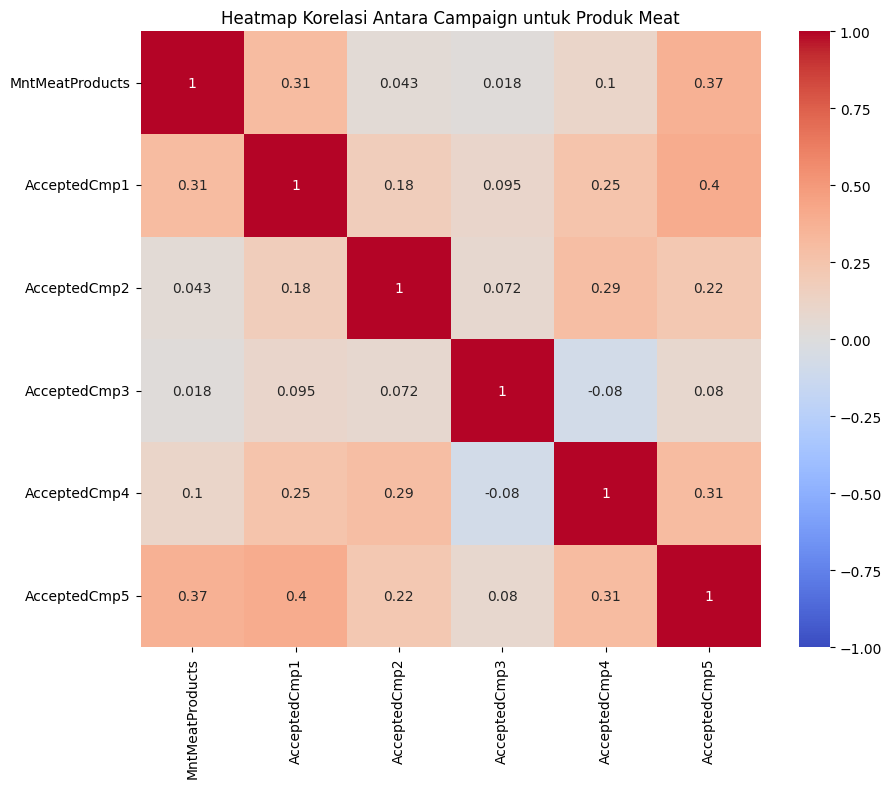

In [44]:
corr_matrix_meat= df[['MntMeatProducts','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].corr()

print("Matrix Korelasi:")
print(corr_matrix_meat)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_meat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Antara Campaign untuk Produk Meat')
plt.show()

Dari data diatas, dapat dilihat bahwa campaign yang paling berpengaruh untuk produk Meat adalah :
- Campaign 5 : Nilai korelasi 0.37
- Campaign 1 : Nilai korelasi 0.31

Meskipun masih jauh dengan angka 1, hal ini bisa menjadi landasan pihak toko untuk membuat **campaign promosi produk meat berdasarkan campaign 5 dan 1**

Selain itu, campaign 1 dan 5 juga memiliki korelasi yang cukup baik. Hal ini bisa menjadi landasan pihak toko untuk membuat campaign dengan mengcombine 2 campaign ini.

### Jenis Campaign yang Paling Efisien untuk Produk Wine

Matrix Korelasi:
              MntWines  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
MntWines      1.000000      0.354133      0.205907      0.062202   
AcceptedCmp1  0.354133      1.000000      0.175315      0.094751   
AcceptedCmp2  0.205907      0.175315      1.000000      0.072020   
AcceptedCmp3  0.062202      0.094751      0.072020      1.000000   
AcceptedCmp4  0.373286      0.251300      0.292210     -0.079512   
AcceptedCmp5  0.472613      0.403078      0.221533      0.080316   

              AcceptedCmp4  AcceptedCmp5  
MntWines          0.373286      0.472613  
AcceptedCmp1      0.251300      0.403078  
AcceptedCmp2      0.292210      0.221533  
AcceptedCmp3     -0.079512      0.080316  
AcceptedCmp4      1.000000      0.306526  
AcceptedCmp5      0.306526      1.000000  


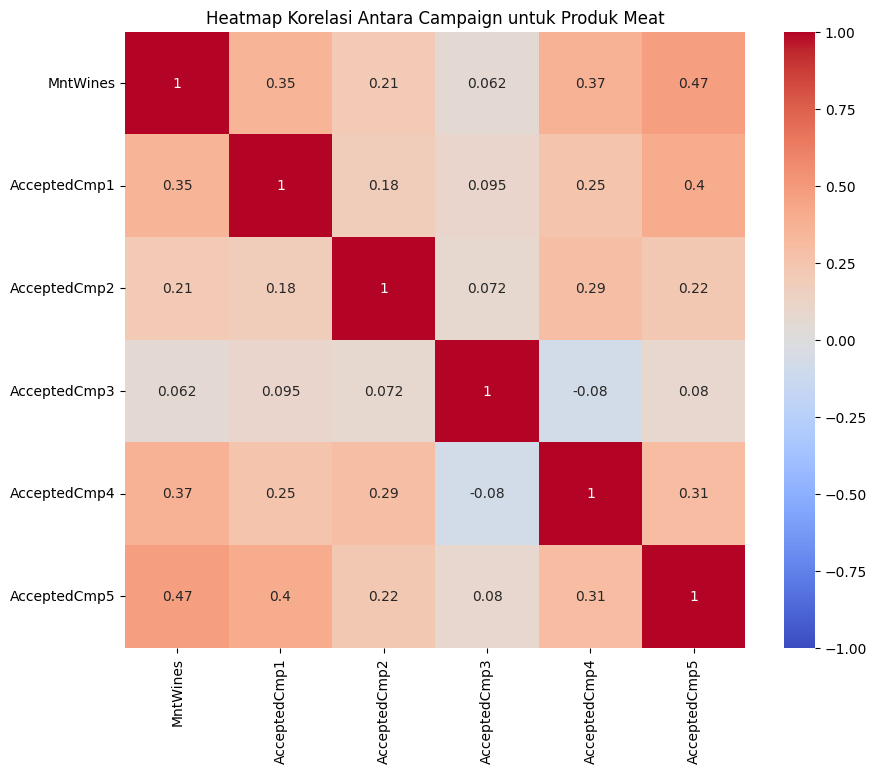

In [45]:
corr_matrix_wine = df[['MntWines','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].corr()

print("Matrix Korelasi:")
print(corr_matrix_wine)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_wine, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Antara Campaign untuk Produk Meat')
plt.show()

Dari data diatas, dapat dilihat bahwa campaign yang paling berpengaruh untuk produk Wine adalah :
- Campaign 5 : Nilai korelasi 0.47
- Campaign 4 : Nilai korelasi 0.37
- Campaign 1 : Nilai korelasi 0.35

Meskipun masih jauh dengan angka 1, hal ini bisa menjadi landasan pihak toko untuk membuat **campaign promosi produk meat berdasarkan campaign 5,4, dan 1**

Selain itu, campaign 1,4,5 juga memiliki korelasi yang cukup baik dibanding dengan campaign lainnya. Pihak toko bisa saja menggabungkan 3 campaign ini untuk membuat campaign yang lebih baik.

### Jenis Campaign yang Paling Efisien untuk Produk Gold

Matrix Korelasi:
              MntGoldProds  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
MntGoldProds      1.000000      0.166396      0.049990      0.123091   
AcceptedCmp1      0.166396      1.000000      0.175315      0.094751   
AcceptedCmp2      0.049990      0.175315      1.000000      0.072020   
AcceptedCmp3      0.123091      0.094751      0.072020      1.000000   
AcceptedCmp4      0.022268      0.251300      0.292210     -0.079512   
AcceptedCmp5      0.181021      0.403078      0.221533      0.080316   

              AcceptedCmp4  AcceptedCmp5  
MntGoldProds      0.022268      0.181021  
AcceptedCmp1      0.251300      0.403078  
AcceptedCmp2      0.292210      0.221533  
AcceptedCmp3     -0.079512      0.080316  
AcceptedCmp4      1.000000      0.306526  
AcceptedCmp5      0.306526      1.000000  


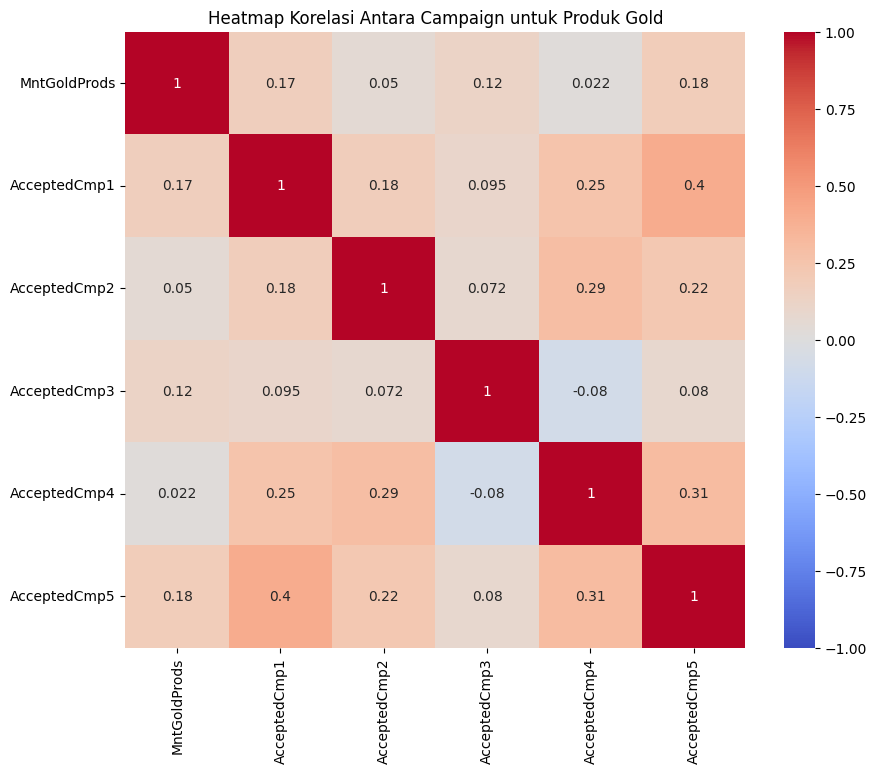

In [46]:
corr_matrix_gold = df[['MntGoldProds','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].corr()

print("Matrix Korelasi:")
print(corr_matrix_gold)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_gold, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Antara Campaign untuk Produk Gold')
plt.show()

Dari data diatas, dapat dilihat bahwa campaign yang paling berpengaruh untuk produk Wine adalah :
- Campaign 5 : Nilai korelasi 0.18
- Campaign 4 : Nilai korelasi 0.17

2 Campaign yang memiliki korelasi tertinggi ini masih cukup kecil. Bisa disimpulkan bahwa belum ada campaign yang efisien untuk gold produk. Pihak toko bisa membuat inovasi campaign khususnya untuk gold produk (mengingat produk ini merupakan top 3 produk di toko tersebut)

## Behaviour Customer Dalam Melakukan Transaksi berdasarkan Online/Offline

In [47]:
sum_channel = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum()
dfSumChannel = pd.DataFrame({'Total': sum_channel}).sort_values(by='Total',ascending=False).reset_index()
dfSumChannel.rename(columns={'index': 'Jenis Channel'},inplace=True)
dfSumChannel

,Jenis Channel,Total
0,NumStorePurchases,12970
1,NumWebPurchases,9150
2,NumCatalogPurchases,5963


In [48]:
dfSumChannel['Type']=['Offline', 'Online', 'Offline']
dfSumChannelNew = dfSumChannel.groupby('Type')[['Total']].sum().reset_index()
dfSumChannelNew

,Type,Total
0,Offline,18933
1,Online,9150


Dapat dilihat bahwa saat ini offline purchases memiliki total transaksi +- 2 kali lipat dibandingkan dengan online purchases. Hal ini bisa menjadikan landasan pihak toko untuk mencoba mengevaluasi web/online storenya. Hal ini dikarenakan digitalisasi, sehingga pihak toko harus aware terhadap online storenya juga.

Sekarang mari kita lihat **sebaran usia online store dan offline store**

### Sebaran Usia Pembeli Offline

In [49]:
df['OfflinePurchases'] = df['NumCatalogPurchases']+df['NumStorePurchases']

In [50]:
ageOfflinePurchases = df.groupby('Age')[['OfflinePurchases']].sum().reset_index()
ageOfflinePurchases.head()

,Age,OfflinePurchases
0,28,6
1,29,60
2,30,42
3,31,63
4,32,111


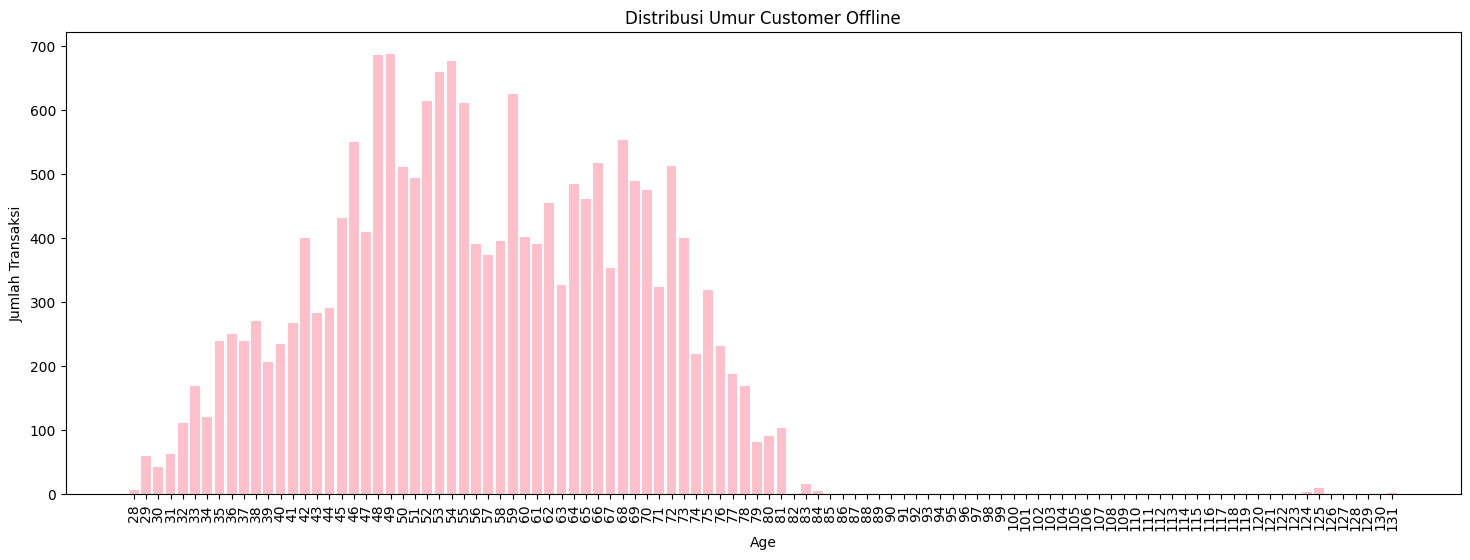

In [51]:
plt.figure(figsize=(18, 6))
bars = plt.bar(ageOfflinePurchases['Age'], ageOfflinePurchases['OfflinePurchases'], color='pink',width= 0.8)
plt.xlabel('Age')
plt.ylabel('Jumlah Transaksi')
plt.title('Distribusi Umur Customer Offline')
plt.xticks(np.arange(28,132,1),rotation = 90)

plt.show()

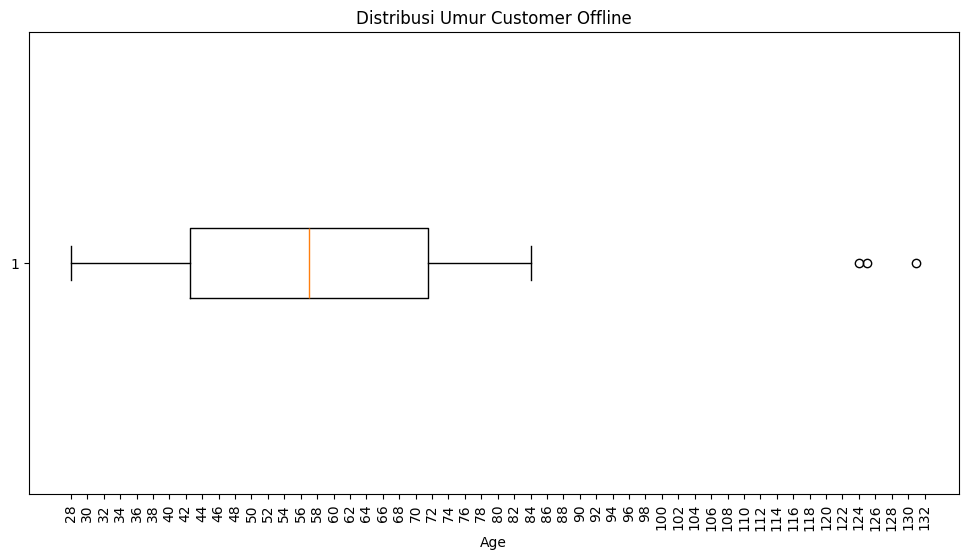

In [52]:
plt.figure(figsize=(12, 6))
plt.boxplot(ageOfflinePurchases['Age'], vert=False) 
plt.xlabel('Age')
plt.title('Distribusi Umur Customer Offline')
plt.xticks(np.arange(28,133,2),rotation = 90)
plt.show()

Dari 2 data diatas, dapat dilihat bahwa customer yang belanja langsung distore kebanyakan berusia **42-70**. Hal ini dapat disimpulkan bahwa pengguna offline store merupakan customer yang berusia cukup dewasa sampai orang tua.

### Sebaran Usia Pembeli Online

In [53]:
ageOnlinePurchases = df.groupby('Age')[['NumWebPurchases']].sum().reset_index()
ageOnlinePurchases.head()

,Age,NumWebPurchases
0,28,4
1,29,14
2,30,15
3,31,22
4,32,41


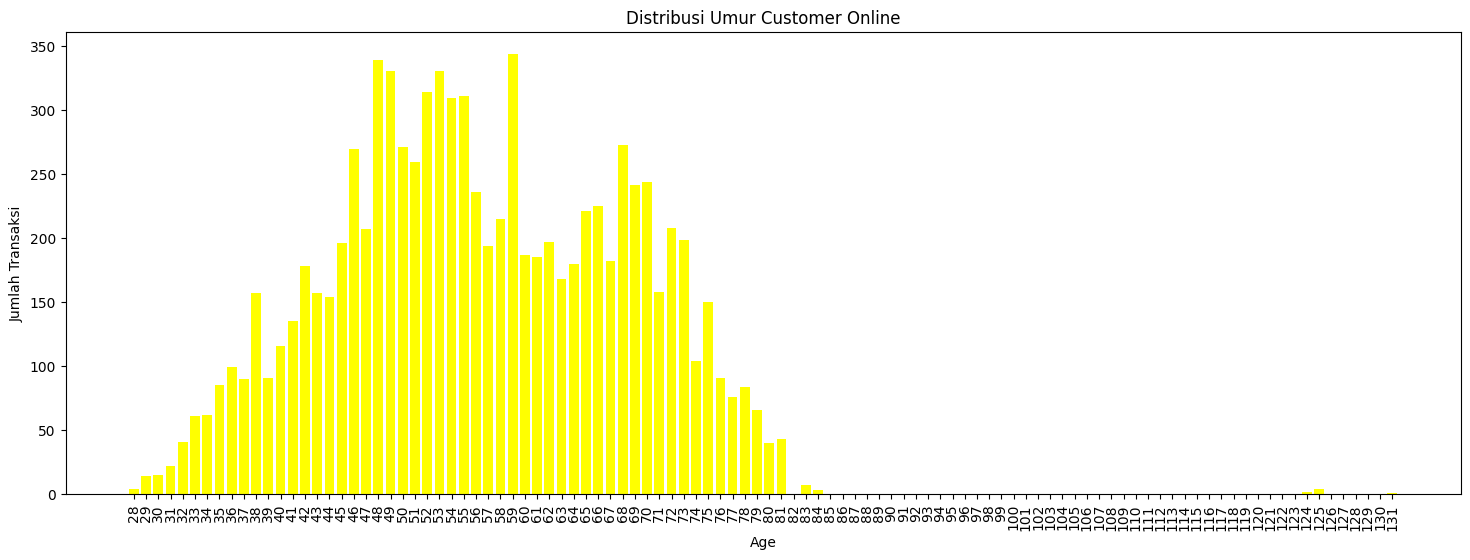

In [54]:
plt.figure(figsize=(18, 6))
bars = plt.bar(ageOnlinePurchases['Age'], ageOnlinePurchases['NumWebPurchases'], color='yellow',width= 0.8)
plt.xlabel('Age')
plt.ylabel('Jumlah Transaksi')
plt.title('Distribusi Umur Customer Online')
plt.xticks(np.arange(28,132,1),rotation = 90)

plt.show()

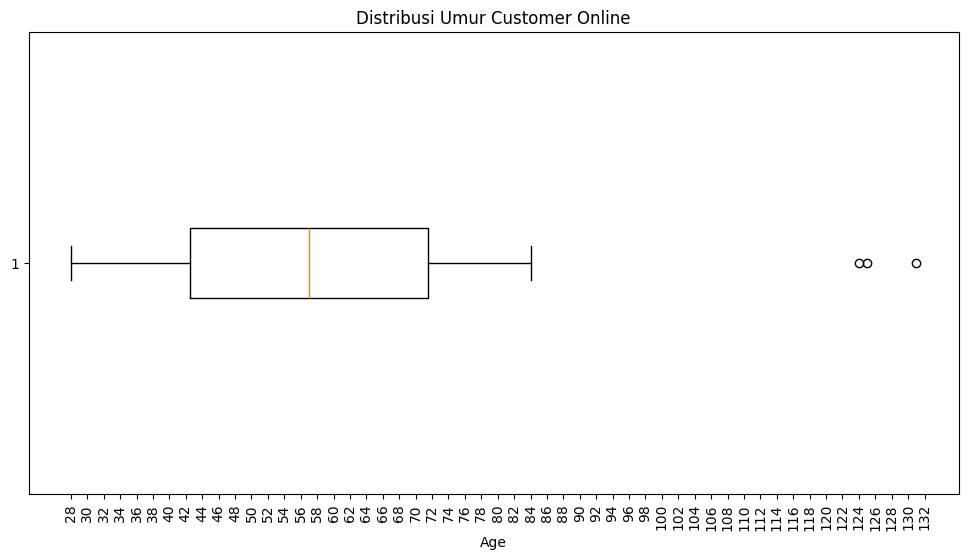

In [55]:
plt.figure(figsize=(12, 6))
plt.boxplot(ageOnlinePurchases['Age'], vert=False) 
plt.xlabel('Age')
plt.title('Distribusi Umur Customer Online')
plt.xticks(np.arange(28,133,2),rotation = 90)
plt.show()

Sama seperti offline store, ternyata sebaran pengguna usia online store ada di range usia **42-70**. Tetapi jumlah transaksinya masih cukup jauh jika dibandingkan dengan offline store.

Terlebih lagi, harusnya millenial dan gen z memiliki kebiasaan belanja online. Harusnya hal ini menjadi perhatian khusus pihak toko untuk menargetkan millenial dan gen z untuk meningkatkan jumlah transaksi di range **usia 28-35**

Sekarang mari kita bandingkan transaksi jumlah transaksi online dengan jumlah visit website per month untuk **membandingkan traffic vs purchasesnya**

In [56]:
sum_web = df[['NumWebPurchases','NumWebVisitsMonth']].sum()
dfSumWeb = pd.DataFrame({'Total': sum_web}).sort_values(by='Total',ascending=False).reset_index()
dfSumWeb.rename(columns={'index': 'Jenis Channel'},inplace=True)


num_visits = dfSumWeb.loc[dfSumWeb['Jenis Channel'] == 'NumWebVisitsMonth', 'Total'].values[0]
num_purchases = dfSumWeb.loc[dfSumWeb['Jenis Channel'] == 'NumWebPurchases', 'Total'].values[0]
print(f'Presentase traffic vs pembeli pada online store adalah {(num_purchases/num_visits)*100}%')
dfSumWeb

Presentase traffic vs pembeli pada online store adalah 76.83264757746242%


,Jenis Channel,Total
0,NumWebVisitsMonth,11909
1,NumWebPurchases,9150


In [57]:
edPerOnlineTrans = df.groupby('Education')[['NumWebVisitsMonth','NumWebPurchases']].sum().reset_index()
edPerOnlineTrans['%Trans vs Traffic']=(edPerOnlineTrans['NumWebPurchases']/sum(edPerOnlineTrans['NumWebVisitsMonth']))*100
edPerOnlineTrans

,Education,NumWebVisitsMonth,NumWebPurchases,%Trans vs Traffic
0,2n Cycle,1107,757,6.356537
1,Basic,371,102,0.856495
2,Graduation,5959,4649,39.037703
3,Master,1916,1492,12.528340
4,PhD,2556,2150,18.053573


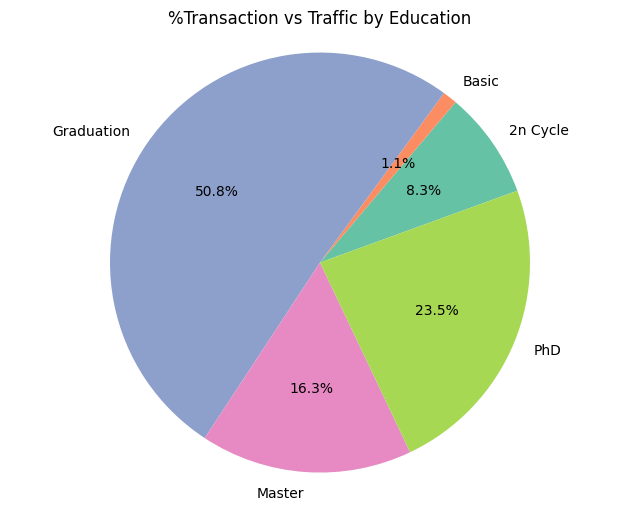

In [58]:

# Plotting pie chart
plt.figure(figsize=(8, 6))
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
plt.pie(edPerOnlineTrans['%Trans vs Traffic'], labels=edPerOnlineTrans['Education'], autopct='%1.1f%%', startangle=20, colors=colors)
plt.title('%Transaction vs Traffic by Education')
plt.axis('equal')  # Memastikan pie chart menjadi lingkaran
plt.show()

Dari 2 data diatas, dapat dilihat bahwa dari **total 11.909 visit ke website, transaksi yang terbentuk adalah 9150 (76.83%)**. Hal ini bisa dibilang masih cukup rendah. Pihak toko bisa mengevaluasi websitenya dan juga melakukan iklan agar customer yang ke toko mengetahui Online store ini.

Selain itu, jika dilihat by Education. Presentase jumlah transaksi tertinggi adalah customer yang educationnya **Graduation, Master, dan PhD**. Hal ini dapat disimpulkan bahwa pengguna online store kebanyakan orang yang memiliki edukasi minimal *graduation*

# Kesimpulan dan Rekomendasi

## Kesimpulan

Dari analisa data diatas, kita dapat menyimpulkan beberapa hal yaitu :
* Tingkat presentase komplain jika dibandingkan dengan jumlah customer masih cukup rendah, yaitu 0.9375%
* 3 jenis produk yang paling diminati oleh customer toko ini adalah Wine, Meat, dan Gold produk
* Hampir semua jenis transaksi, sebaran usia customernya 40-72
* Income memiliki hubungan yang signifikan dengan jumlah transaksi per produk. Urutan kategori income untuk customer toko ini adalah *high, medium, low, premium*
* Jenis campaign 1-5 tidak semuanya memiliki korelasi dengan jumlah transaksi per produk
* Hampir 2 lipat customer masih belanja di store offline yaitu 18933 transaksi, sedangkan online store hanya 9150 transaksi
* Presentase traffic website vs pembeli pada online store hanya 76.83%
* Pembeli online store kebanyakan customer yang memiliki education diatas *graduation*

## Rekomendasi

Berikut adalah rekomendasi data scientist kepada pihak toko :

1. Pihak toko harus mempertahankan nilai presentase komplain dengan terus memberikan layanan terbaiknya
2. Pihak toko meningkatkan variansi produk khususnya Wine, Meat, dan Gold Produk
3. Pihak toko melakukan clustering produk sesuai dengan 4 jenis kategori income. Toko bisa memfokuskan ke kategori *high* karena jumlah customernya paling banyak. Selain itu, clustering  jenis produk ini mempengaruhi planogram (display produk) pada store.
4. Pihak toko mereview ulang campaign yang sudah berjalan, disesuaikan dengan customer yang memiliki usia 40-72 tahun
5. Pihak toko melakukan maintenance terhadap online store, dikarenakan kebanyakan customernya belanja secara offline
6. Pihak toko melakukan upgrade website dari segi UI/UX. Hal ini bertujuan untuk meningkatkan traffic dan juga presentase belanja vs traffic terhadap website tersebut

Dengan melakukan promosi dan clustering produk sesuai dengan demografi customer, diharapkan pihak toko bisa melakukan pengembangan toko yang lebih efektif dan efisien dari segi uang maupun waktu

In [60]:
df
df.to_csv('Supermarket Customers Fix.csv', index=False)